<a href="https://colab.research.google.com/github/Lailson001/Limpeza-Dataset-Financeiro/blob/main/Explora%C3%A7%C3%A3o_e_Limpeza_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Carregando um dataset Financeiro para iniciar a exploração

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl


In [5]:
# Carregando o dataset do Excel para análise
df = pd.read_excel("/content/drive/MyDrive/Projetos Ciencia de Dados/default of credit card clients.xls", header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# Exibindo as colunas do dataset para ter uma visão geral das variáveis
df.columns


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
# Exibindo as primeiras 5 linhas do dataset para entender seu formato
df.shape

(30000, 25)

In [ ]:
# Contando quantas vezes cada ID aparece no dataset
id_counts = df['ID'].value_counts()
id_counts.head()

,count
ID,
29984,1
29983,1
29982,1
29981,1
29980,1


In [ ]:
# Verificando a quantidade de valores diferentes de ID, para detectar duplicados
id_counts.value_counts()

,count
count,
1,30000


In [8]:
# Verificando a integridade dos dados e encontrando IDs duplicados
dup_mask = id_counts == 2  # Máscara para detectar IDs duplicados
dup_mask[0:5]

NameError: name 'id_counts' is not defined

In [ ]:
# Mostrando os primeiros IDs duplicados
id_counts.index[0:5]

Index([29984, 29983, 29982, 29981, 29980], dtype='int64', name='ID')

In [ ]:
# Coletando os IDs duplicados
dup_ids = id_counts.index[dup_mask]
dup_ids = list(dup_ids)
len(dup_ids)

0

In [ ]:
# Exibindo as primeiras 10 linhas de registros duplicados para verificar
df.loc[df['ID'].isin(dup_ids[0:3]),:].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [ ]:
# Verificando valores 0 no dataset para encontrar possíveis erros de preenchimento
df_zero_mask = df == 0
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
sum(feature_zero_mask)

0

In [ ]:
# Removendo registros onde todas as colunas (exceto ID) possuem valor zero
df_clean_1 = df.loc[~feature_zero_mask,:].copy()



In [ ]:
# Verificando informações sobre o DataFrame após a limpeza
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_AMT3  

In [ ]:
# Exibindo a contagem de valores únicos na coluna 'PAY_0' para entender sua distribuição
df_clean_1['PAY_0'].value_counts()

,count
PAY_0,
0,14737
-1,5686
1,3688
-2,2759
2,2667
3,322
4,76
5,26
8,19


In [ ]:
# Criando uma máscara para verificar valores não numéricos na coluna 'PAY_0'
valid_pay_mask = df_clean_1['PAY_0'] != 'Not number'
valid_pay_mask[0:5]

,PAY_0
0,True
1,True
2,True
3,True
4,True


In [ ]:
# Contando o número de valores válidos na coluna 'PAY_0'
sum(valid_pay_mask)

30000

In [ ]:
# Limpando os dados para remover valores inválidos em 'PAY_0'
df_clean_2 = df_clean_1.loc[valid_pay_mask,:].copy()
df_clean_2['PAY_0'] = df_clean_2['PAY_0'].astype('int64')
df_clean_2[['PAY_0', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_0   30000 non-null  int64
 1   PAY_2   30000 non-null  int64
dtypes: int64(2)
memory usage: 703.1 KB


In [ ]:
# Gerando estatísticas descritivas para as colunas 'LIMIT_BAL' e 'AGE'
df_clean_2[['LIMIT_BAL','AGE']].describe()

,LIMIT_BAL,AGE
count,30000.000000,30000.000000
mean,167484.322667,35.485500
std,129747.661567,9.217904
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,1000000.000000,79.000000


array([[<Axes: title={'center': 'LIMIT_BAL'}>,
        <Axes: title={'center': 'AGE'}>]], dtype=object)

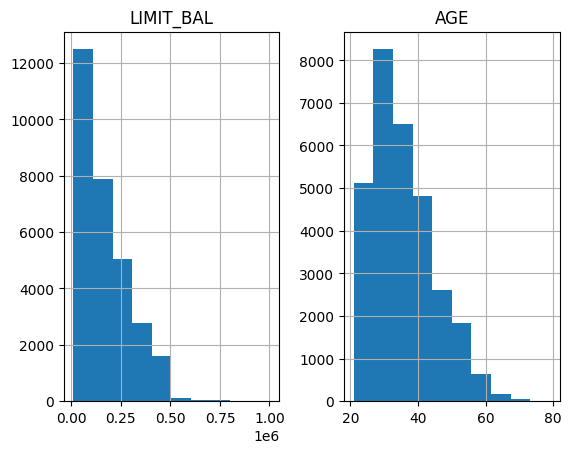

In [ ]:
# Visualizando a distribuição de 'LIMIT_BAL' e 'AGE' com histogramas
df_clean_2[['LIMIT_BAL','AGE']].hist()

In [ ]:
# Substituindo valores inválidos na coluna 'EDUCATION' (0, 5 e 6) por 4
df_clean_2['EDUCATION'].replace(to_replace=[0,5,6], value = 4, inplace=True)


<ipython-input-22-deabaf6c352a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean_2['EDUCATION'].replace(to_replace=[0,5,6], value = 4, inplace=True)


In [9]:

# Verificando as contagens dos diferentes valores de 'EDUCATION' após substituição
df_clean_2['EDUCATION'].value_counts()


NameError: name 'df_clean_2' is not defined

In [ ]:
#Substituindo valor 0 por 3 na coluna 'MARRIAGE' (representando status marital)
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

<ipython-input-24-feaf91dc5dc0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)


,count
MARRIAGE,
2,15964
1,13659
3,377


Text(0.5, 0, 'education level: ordinal encoding')

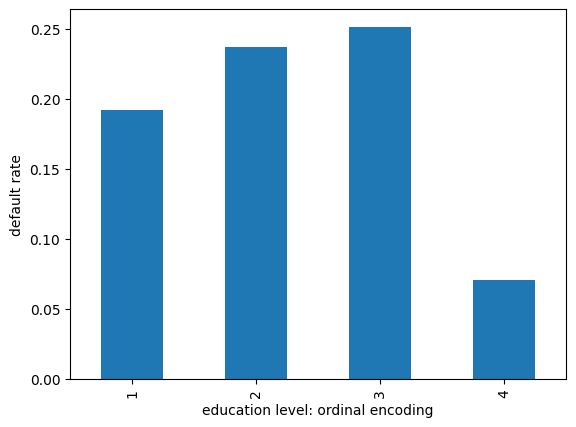

In [ ]:
# Agrupando os dados por 'EDUCATION' e calculando a taxa média de inadimplência (default)
df_clean_2.groupby('EDUCATION').agg({'default payment next month': 'mean'}).plot.bar(legend=False)
plt.ylabel('default rate')
plt.xlabel('education level: ordinal encoding')

In [ ]:
# Criando uma nova coluna 'EDUCATION_CAT' para mapeamento textual das categorias de educação
df_clean_2['EDUCATION_CAT'] = 'none'
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [ ]:
# Mapeando valores numéricos de 'EDUCATION' para categorias textuais
cat_maping={
    1:"graduate school",
    2:"university",
    3:"high school",
    4:"others"
}
df_clean_2['EDUCATION_CAT']= df_clean_2['EDUCATION'].map(cat_maping)
df_clean_2[['EDUCATION','EDUCATION_CAT']].head(10)


,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [ ]:
# Aplicando One Hot Encoding na coluna 'EDUCATION_CAT' para criar variáveis binárias (0 ou 1)
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'],dtype=int)
edu_ohe.head()

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [ ]:
# Concatenando as novas colunas binárias (One Hot Encoding) ao DataFrame original
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'], dtype=int)
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school',
             'high school', 'university', 'others']].head(10)


,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [ ]:
df_with_ohe.to_csv('/content/drive/MyDrive/Projetos Ciencia de Dados/df_with_ohe.csv', index=False)

In [ ]:
pd.read_csv('/content/drive/MyDrive/Projetos Ciencia de Dados/df_with_ohe.csv').head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,3,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,4,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,5,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [ ]:
# Exibindo estatísticas descritivas para as colunas de pagamento 'PAY_0' a 'PAY_6'
pay_feats=['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df[pay_feats].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [ ]:

# Exibindo a distribuição dos valores de 'PAY_0'
df[pay_feats[0]].value_counts().sort_index()

,count
PAY_0,
-2,2759
-1,5686
0,14737
1,3688
2,2667
3,322
4,76
5,26
6,11


<function matplotlib.pyplot.show(close=None, block=None)>

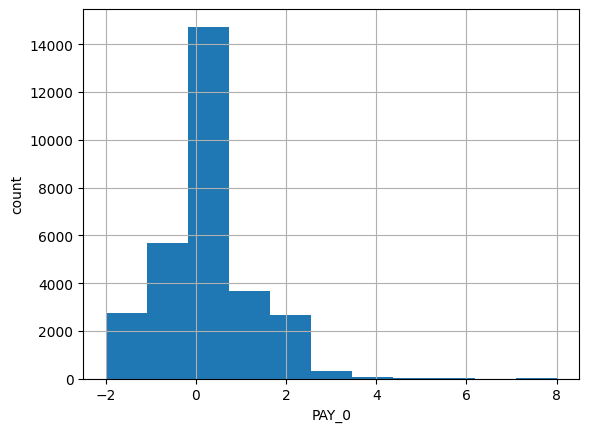

In [ ]:

# Exibindo a distribuição dos valores de 'PAY_0'
df[pay_feats[0]].hist(bins= 11)
plt.xlabel('PAY_0')
plt.ylabel('count')
plt.show

array([[<Axes: title={'center': 'PAY_0'}>,
        <Axes: title={'center': 'PAY_2'}>,
        <Axes: title={'center': 'PAY_3'}>],
       [<Axes: title={'center': 'PAY_4'}>,
        <Axes: title={'center': 'PAY_5'}>,
        <Axes: title={'center': 'PAY_6'}>]], dtype=object)

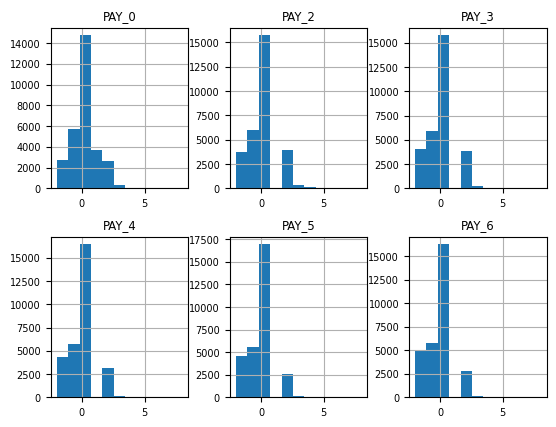

In [ ]:
# Ajustando o tamanho da fonte nos gráficos para facilitar a visualização
mpl.rcParams['font.size']=7
df[pay_feats].hist(bins=11,layout=(2,3))

In [ ]:
# Criando histogramas para todas as colunas de pagamento de forma compacta (layout 2x3)
bill_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_feats = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [ ]:
# Exibindo estatísticas descritivas para as colunas de contas de cartão de crédito 'BILL_AMT1' a 'BILL_AMT6'
df[bill_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


array([[<Axes: title={'center': 'BILL_AMT1'}>,
        <Axes: title={'center': 'BILL_AMT2'}>,
        <Axes: title={'center': 'BILL_AMT3'}>],
       [<Axes: title={'center': 'BILL_AMT4'}>,
        <Axes: title={'center': 'BILL_AMT5'}>,
        <Axes: title={'center': 'BILL_AMT6'}>]], dtype=object)

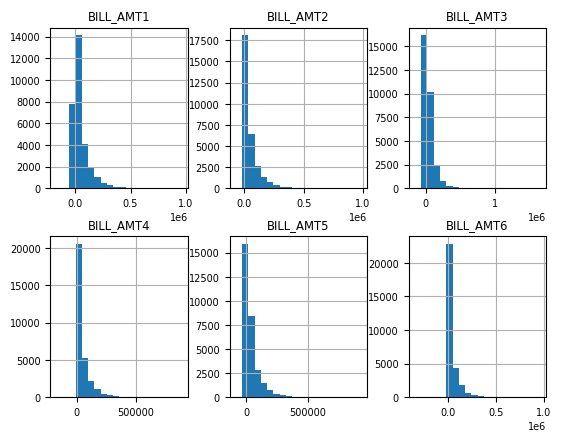

In [ ]:
# Criando histogramas para as colunas de contas de cartão de crédito
df[bill_feats].hist(bins=20, layout=(2,3))

In [ ]:
# Exibindo estatísticas descritivas para as colunas de pagamento 'PAY_AMT1' a 'PAY_AMT6'
df[pay_amt_feats].describe()


,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


array([[<Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>,
        <Axes: title={'center': 'PAY_AMT3'}>],
       [<Axes: title={'center': 'PAY_AMT4'}>,
        <Axes: title={'center': 'PAY_AMT5'}>,
        <Axes: title={'center': 'PAY_AMT6'}>]], dtype=object)

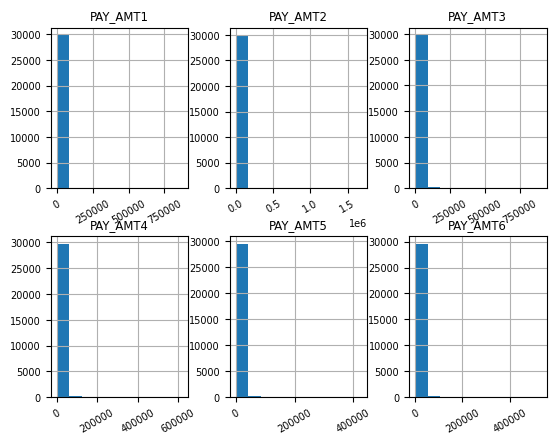

In [ ]:
# Criando histogramas para as colunas de pagamento
df[pay_amt_feats].hist(layout=(2,3), xrot=30)

In [ ]:
# Verificando quantos valores de pagamento são zero
pay_zero_mask = df[pay_amt_feats] == 0
pay_zero_mask.sum()

,0
PAY_AMT1,5249
PAY_AMT2,5396
PAY_AMT3,5968
PAY_AMT4,6408
PAY_AMT5,6703
PAY_AMT6,7173


In [ ]:
# Exibindo os primeiros valores da máscara de pagamento zero
pay_zero_mask.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


array([[<Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>,
        <Axes: title={'center': 'PAY_AMT3'}>],
       [<Axes: title={'center': 'PAY_AMT4'}>,
        <Axes: title={'center': 'PAY_AMT5'}>,
        <Axes: title={'center': 'PAY_AMT6'}>]], dtype=object)

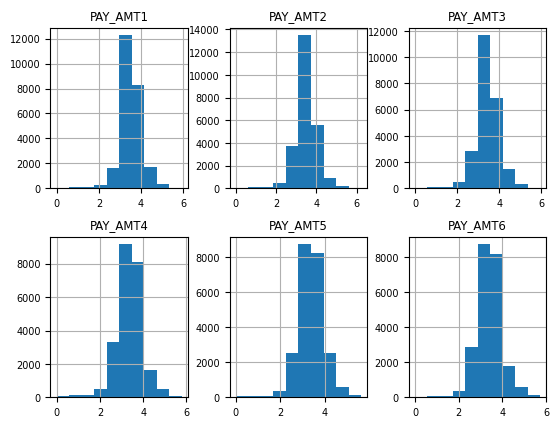

In [ ]:
# Aplicando o logaritmo base 10 nos valores de pagamento não zero para visualização
df[pay_amt_feats][~pay_zero_mask].apply(np.log10).hist(layout=(2,3))

In [ ]:
df_with_ohe.to_csv('/content/drive/MyDrive/Projetos Ciencia de Dados/datacleaning1.csv', index=False)

In [ ]:
#Obtendo a média da variavel de resposta
df['default payment next month'].mean()

np.float64(0.2212)

In [ ]:
df.groupby('default payment next month')['ID'].count()

,ID
default payment next month,
0,23364
1,6636
